In [ ]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data= pd.read_csv('/content/Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
data.shape

(30, 2)

In [ ]:
data.info

<bound method DataFrame.info of     YearsExperience  Salary
0               1.1   39343
1               1.3   46205
2               1.5   37731
3               2.0   43525
4               2.2   39891
5               2.9   56642
6               3.0   60150
7               3.2   54445
8               3.2   64445
9               3.7   57189
10              3.9   63218
11              4.0   55794
12              4.0   56957
13              4.1   57081
14              4.5   61111
15              4.9   67938
16              5.1   66029
17              5.3   83088
18              5.9   81363
19              6.0   93940
20              6.8   91738
21              7.1   98273
22              7.9  101302
23              8.2  113812
24              8.7  109431
25              9.0  105582
26              9.5  116969
27              9.6  112635
28             10.3  122391
29             10.5  121872>

In [ ]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [ ]:
data.dtypes

YearsExperience    float64
Salary               int64
dtype: object

In [ ]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [ ]:
data.skew()

YearsExperience    0.37956
Salary             0.35412
dtype: float64

In [ ]:
data.kurt()

YearsExperience   -1.012212
Salary            -1.295421
dtype: float64

In [ ]:
#check any correlation and covariance

data[['YearsExperience','Salary']].cov()

,YearsExperience,Salary
YearsExperience,8.053609,7.610630e+04
Salary,76106.303448,7.515510e+08


In [ ]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


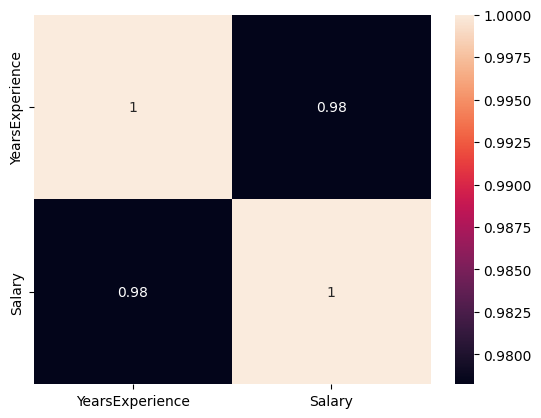

In [ ]:
sns.heatmap(data.corr(),annot=True)
plt.show()

In [ ]:
X=data.drop('Salary',axis=1)

In [ ]:
Y=data['Salary']

In [ ]:
X.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [ ]:
Y.head()

0    39343
1    46205
2    37731
3    43525
4    39891
Name: Salary, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=0,test_size=0.30)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21, 1)
(9, 1)
(21,)
(9,)


In [ ]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [ ]:
LR.coef_

array([9360.26128619])

In [ ]:
LR.intercept_

26777.391341197625

In [ ]:
y_pred=LR.predict(X_test)

In [ ]:
y_pred

array([ 40817.78327049, 123188.08258899,  65154.46261459,  63282.41035735,
       115699.87356004, 108211.66453108, 116635.89968866,  64218.43648597,
        76386.77615802])

In [ ]:
y_test

2      37731
28    122391
13     57081
10     63218
26    116969
24    109431
27    112635
11     55794
17     83088
Name: Salary, dtype: int64

In [ ]:
x_predict=LR.predict(X_train)
x_predict

array([100723.45550213,  53922.14907116,  74514.72390079,  56730.22745702,
        68898.56712907, 103531.53388799,  90427.16808731,  38945.73101325,
       125060.13484623,  54858.17519978,  47369.96617082,  82002.93292974,
        82938.95905836,  61410.35810011,  56730.22745702, 111019.74291694,
        45497.91391358,  37073.67875601,  93235.24647317,  72642.67164355,
        64218.43648597])

In [ ]:
new_df=pd.DataFrame({"Actual":y_test,"Predict":y_pred})
new_df

,Actual,Predict
2,37731,40817.783270
28,122391,123188.082589
13,57081,65154.462615
10,63218,63282.410357
26,116969,115699.873560
24,109431,108211.664531
27,112635,116635.899689
11,55794,64218.436486
17,83088,76386.776158


In [ ]:
LR.score(X_train,y_train)*100

94.2377765219338

In [ ]:
LR.score(X_test,y_test)*100

97.4099340721351

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

23370078.800832972

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

4834.260936361728

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

3737.417861878896

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)*100


97.4099340721351